In [13]:
import pandas as pd
from pathlib import Path
import inspect
import random

import datetime
import os
import shutil
import json
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
from matplotlib.ticker import MaxNLocator
import scipy


import pickle
import seaborn as sns
sns.set()


In [10]:
night_data = pd.read_parquet("../data_manipulation/final_night_data.parquet")
day_data = pd.read_parquet("../data_manipulation/final_day_data.parquet")


In [3]:
def set_season_tag(df, isnorth = True):
    if isnorth:
        df["season"] = (df['DateTime'].dt.month%12 + 3) // 3 # print(seasons)
    else:
        df["season"] = ((df['DateTime'].dt.month + 6)%12 + 3)//3
    return df, "season"

def extract_time_features(df):
    """
    Extract features from the timestamp for model training.
    
    Parameters:
    data (pd.DataFrame): DataFrame with 'Timestamp' and 'NEE' columns.
    
    Returns:
    pd.DataFrame: DataFrame with extracted features, list: features added to dataframe
    """
    df = df.copy()
    df['hour'] = df['DateTime'].dt.hour
    df['dayofweek'] = df['DateTime'].dt.dayofweek
    df['month'] = df['DateTime'].dt.month
    df['dayofyear'] = df['DateTime'].dt.dayofyear
    return df, ["hour", "dayofweek", "month", "dayofyear"]
    
def split_data(df, test_size=0.2):
    """
    Split data into training and test sets.
    
    Parameters:
    data (pd.DataFrame): DataFrame with 'Timestamp' and 'NEE' columns.
    test_size (float): Proportion of the data to include in the test split.
    
    Returns:
    tuple: Training and test DataFrames.
    """
    train_data, test_data = train_test_split(df, test_size=test_size, shuffle=False)
    return train_data.reset_index(drop=True), test_data.reset_index(drop=True)

def physics_nee(k, T, Tref=10, T0=46.02):
    e0 = k[:, 0]
    rb = k[:, 1]
    exp_term = np.exp(e0 * (1.0 / (Tref - T0) - 1.0 / (T - T0)))
    NEE = rb * exp_term
    return NEE

Normality Score Night:  NormaltestResult(statistic=1393.7087320042353, pvalue=2.2908368215626733e-303)
Normality Score Day:  NormaltestResult(statistic=777.8347517716315, pvalue=1.2454598637339888e-169)


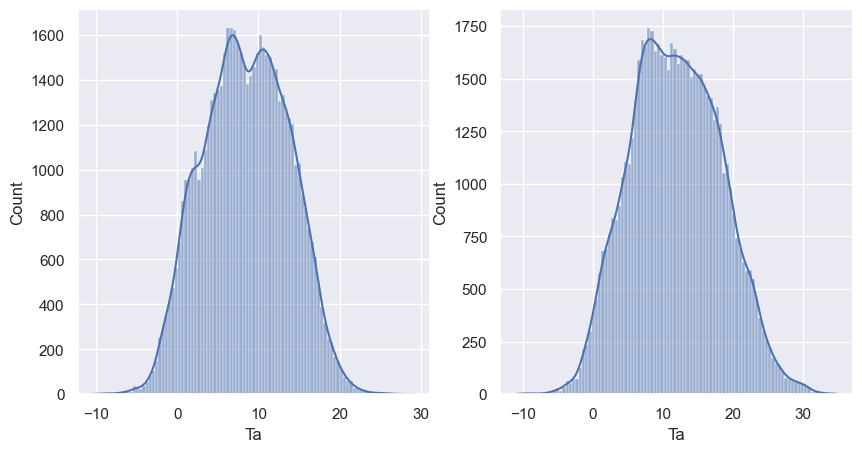

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), dpi=100)
sns.histplot(night_data['Ta'], ax=ax[0], kde=True)
sns.histplot(day_data['Ta'], ax=ax[1], kde=True)
print("Normality Score Night: ", scipy.stats.normaltest(night_data['Ta'], nan_policy="omit"))
print("Normality Score Day: ", scipy.stats.normaltest(day_data['Ta'], nan_policy="omit"))

Normality Score Night:  NormaltestResult(statistic=77338.84841129524, pvalue=0.0)
Normality Score Day:  NormaltestResult(statistic=9196.219683171515, pvalue=0.0)


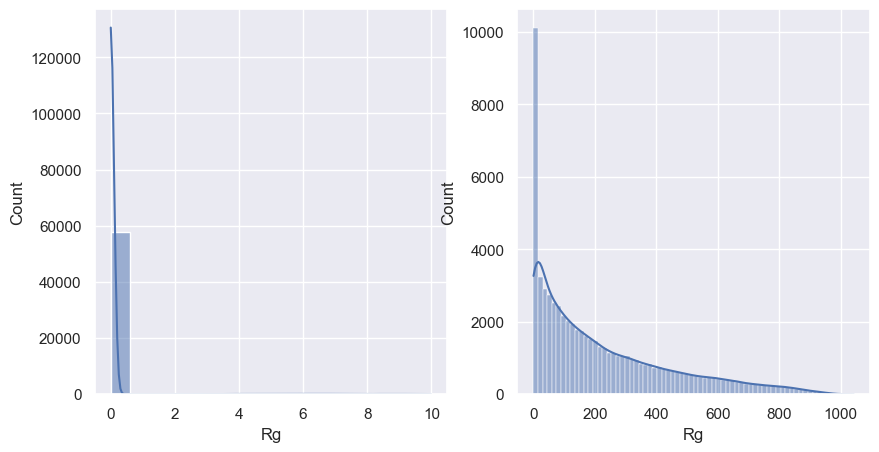

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), dpi=100)
sns.histplot(night_data['Rg'], ax=ax[0], kde=True)
sns.histplot(day_data['Rg'], ax=ax[1], kde=True)
print("Normality Score Night: ", scipy.stats.normaltest(night_data['Rg'], nan_policy="omit"))
print("Normality Score Day: ", scipy.stats.normaltest(day_data['Rg'], nan_policy="omit"))